In [3]:
!pip install matplotlib scipy sounddevice soundfile

  Using cached sounddevice-0.5.3-py3-none-macosx_10_6_x86_64.macosx_10_6_universal2.whl.metadata (1.6 kB)
  Using cached soundfile-0.13.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (16 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 63.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 62.8 MB/s  0:00:00 eta 0:00:01
Using cached sounddevice-0.5.3-py3-none-macosx_10_6_x86_64.macosx_10_6_universal2.whl (108 kB)
Using cached soundfile-0.13.1-py2.py3-none-macosx_11_0_arm64.whl (1.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 62.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.4 MB/s  0:00:00
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [matplotlib]0 [matplotlib]


In [51]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import sounddevice as sd
import soundfile as sf

### 1. Create a synthetic signal as a sum of sinusoids (1 point)

#### a) create sinusoids with chosen amplitudes and phases

Create 4 sinusoids of 3 s length, with different amplitude, frequencies 100, 500, 1500,
2500 Hz, different phases, sampled at 8kHz. (Hint: how many samples the signal must
have for 3 s length? take into account fs).

In [52]:
# For crating a sin_waves 1. we need to have 5 items:
# frequency
# amplitude
# duration
# sampling_rate
# phase

# 2. then creating t
# 3. sin formula

def create_sin_waves(frequency, amplitude, duration, sampling_rate, phase):
  t = np.linspace(0, duration, int(sampling_rate * duration))
  y = amplitude * np.sin(2 * np.pi * frequency * t + phase)
  return y, t


freqs = [100, 500, 1500, 2500]
amplitudes = [1, 0.5, 0.25, 0.125]
phases = [0, np.pi/4, np.pi/2, np.pi/6]
duration = 3
sampling_rate = 8000

s1, _ = create_sin_waves(freqs[0], amplitudes[0], duration, sampling_rate, phases[0])
s2, _ = create_sin_waves(freqs[1], amplitudes[1], duration, sampling_rate, phases[0])
s3, _ = create_sin_waves(freqs[2], amplitudes[2], duration, sampling_rate, phases[0])
s4, t = create_sin_waves(freqs[3], amplitudes[3], duration, sampling_rate, phases[0])

#### b.1) Play sinusoids

In [53]:
sd.play(s1, sampling_rate)
sd.wait()

sd.play(s2, sampling_rate)
sd.wait()

sd.play(s3, sampling_rate)
sd.wait()

sd.play(s4, sampling_rate)
sd.wait()

sf.write('sin1.wav', s1, sampling_rate)
sf.write('sin2.wav', s2, sampling_rate)
sf.write('sin3.wav', s3, sampling_rate)
sf.write('sin4.wav', s4, sampling_rate)

#### b.2) Plot sinusoids (only first 200 samples are displayed for better visualization)

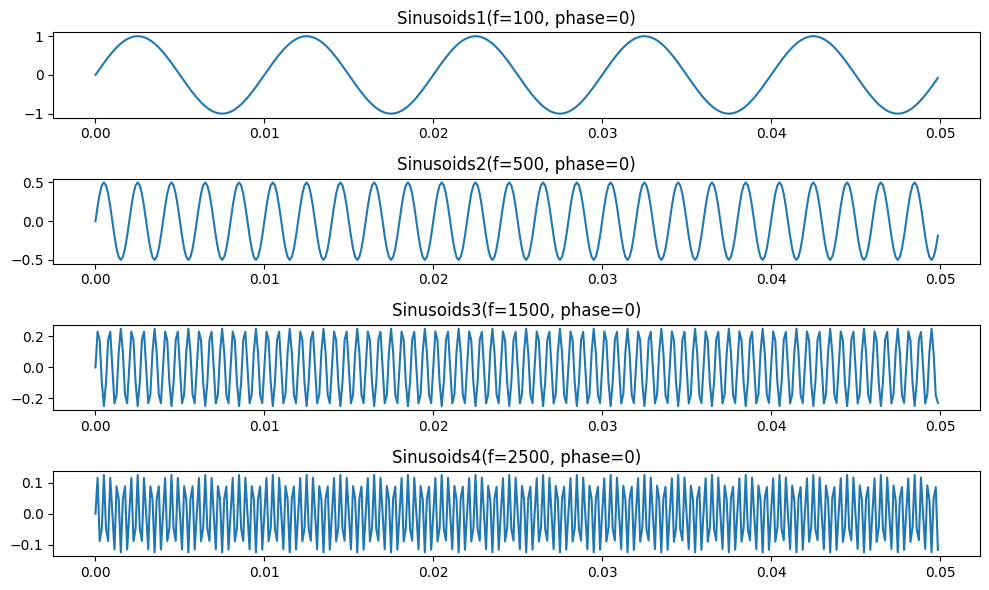

In [54]:
plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(t[:400], s1[:400])
plt.title("Sinusoids1(f=100, phase=0)")

plt.subplot(4, 1, 2)
plt.plot(t[:400], s2[:400])
plt.title("Sinusoids2(f=500, phase=0)")

plt.subplot(4, 1, 3)
plt.plot(t[:400], s3[:400])
plt.title("Sinusoids3(f=1500, phase=0)")


plt.subplot(4, 1, 4)
plt.plot(t[:400], s4[:400])
plt.title("Sinusoids4(f=2500, phase=0)")


plt.tight_layout()
plt.show()

#### c) Add them up to x(t). Plot and play x(t). Write the signal to a wav file.

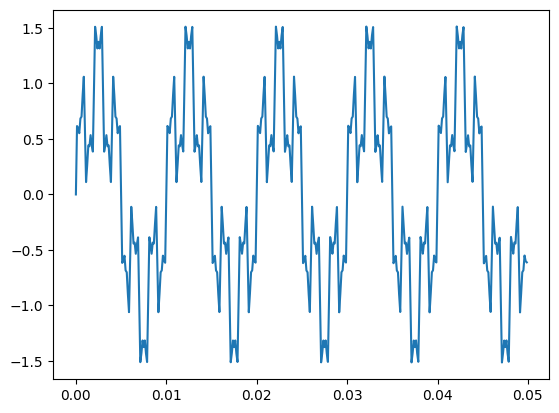

In [55]:
fs = 8000
x = s1 + s2 + s3 + s4

sd.play(x,fs)
sd.wait()
sf.write('Xsum.wav', x, sampling_rate)

plt.plot(t[:400], x[:400])


#### d) Apply DFT with nfft= 512

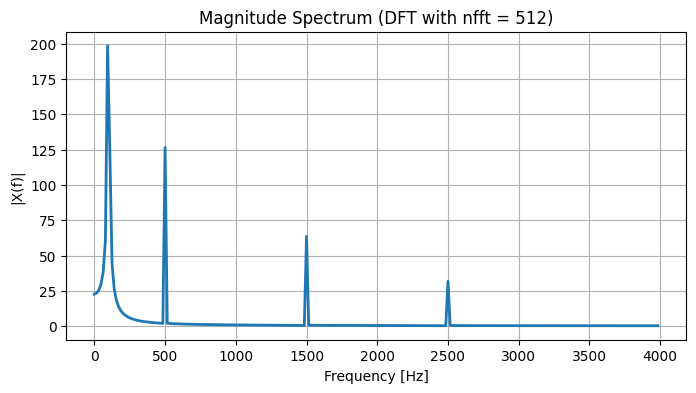

In [56]:
# Apply FFT with nfft = 512
nfft = 512
X = fft(x[:nfft])
freq_axis = np.fft.fftfreq(nfft, 1/fs)

# Only positive frequencies (first half)
half = nfft // 2
magnitude = np.abs(X[:half])

# Plot magnitude spectrum
plt.figure(figsize=(8, 4))
plt.plot(freq_axis[:half], magnitude, linewidth=2)
plt.title('Magnitude Spectrum (DFT with nfft = 512)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('|X(f)|')
plt.grid(True)
plt.show()


#### d.1) Apply DFT with nfft= 258

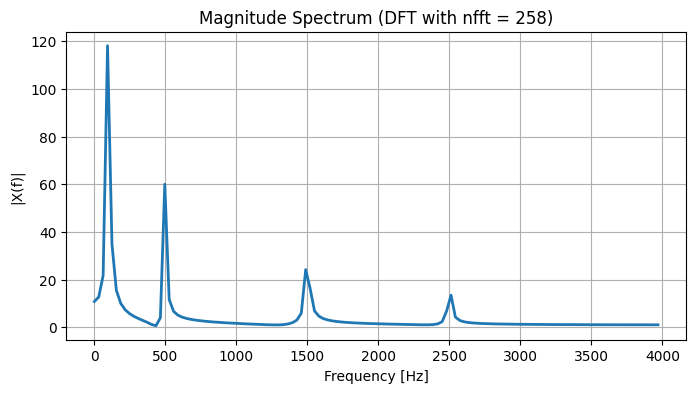

In [57]:
# Apply FFT with nfft = 258
nfft = 258
X = fft(x[:nfft])
freq_axis = np.fft.fftfreq(nfft, 1/fs)

# Only positive frequencies (first half)
half = nfft // 2
magnitude = np.abs(X[:half])

# Plot magnitude spectrum
plt.figure(figsize=(8, 4))
plt.plot(freq_axis[:half], magnitude, linewidth=2)
plt.title('Magnitude Spectrum (DFT with nfft = 258)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('|X(f)|')
plt.grid(True)
plt.show()

#### d.2) Apply DFT with nfft= signal length

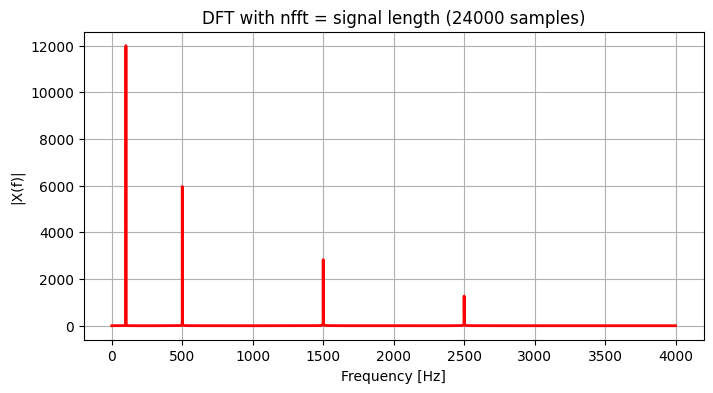

In [58]:
nfft_full = len(x)
X2 = fft(x, nfft_full)
freq_axis2 = np.fft.fftfreq(nfft_full, 1/fs)
half2 = nfft_full // 2

plt.figure(figsize=(8, 4))
plt.plot(freq_axis2[:half2], np.abs(X2[:half2]), 'r', linewidth=2)
plt.title(f'DFT with nfft = signal length ({nfft_full} samples)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('|X(f)|')
plt.grid(True)
plt.show()


#### e) Observe the components and relationship between nfft and frequency in Hz. Report your observation

We create four sinusoidal signals and vary these inputs:

* Phase: only shifts the starting point in time; the waveform’s shape and frequency stay the same.

* Amplitude: changes the height (magnitude) of the signal.

* Frequency: higher frequency → faster oscillations (more cycles per second).

After summing the four signals and applying the DFT/FFT, we observe four spectral peaks at the frequencies of the original components.

Regarding nfft: using a larger nfft increases frequency resolution, so the spectrum is more accurate and peaks are sharper. When we set nfft = the signal length, we analyze all available samples, giving the most precise spectrum for that data segment.

### 2. Read an audio and observe the spectrum. (1 point)

#### a) Read 'audio1.wav'

In [59]:
filename = 'audio1.wav'
x_audio1, fs_audio1 = sf.read(filename)

#### a.1) Play

In [60]:
sd.play(x_audio1, fs_audio1)
sd.wait()


#### a.2) Plot

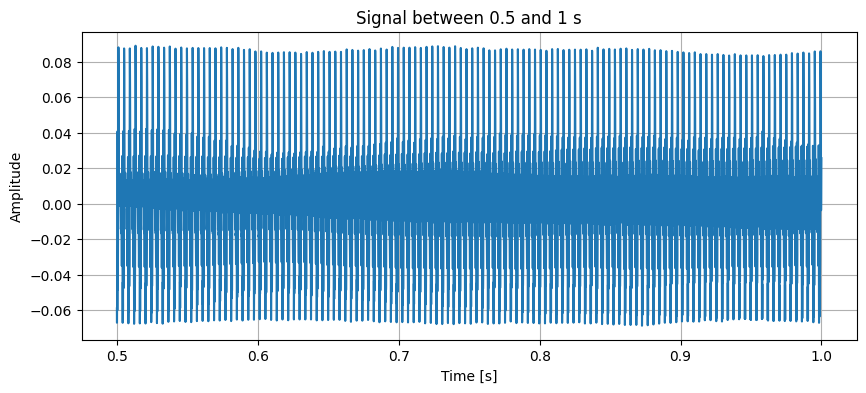

In [61]:
start_time = 0.5
end_time = 1.0

start_idx = int(start_time * fs_audio1)
end_idx = int(end_time * fs_audio1)

t = np.arange(len(x_audio1)) / fs_audio1
plt.figure(figsize=(10, 4))
plt.plot(t[start_idx:end_idx], x_audio1[start_idx:end_idx])
plt.title('Signal between 0.5 and 1 s')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


#### a.3) Read 'audio2.wav'

In [62]:
filename = 'audio2.wav'
x_audio2, fs_audio2 = sf.read(filename)

#### a.4) Play

In [63]:
sd.play(x_audio2, fs_audio2)
sd.wait()

#### a.5) Plot

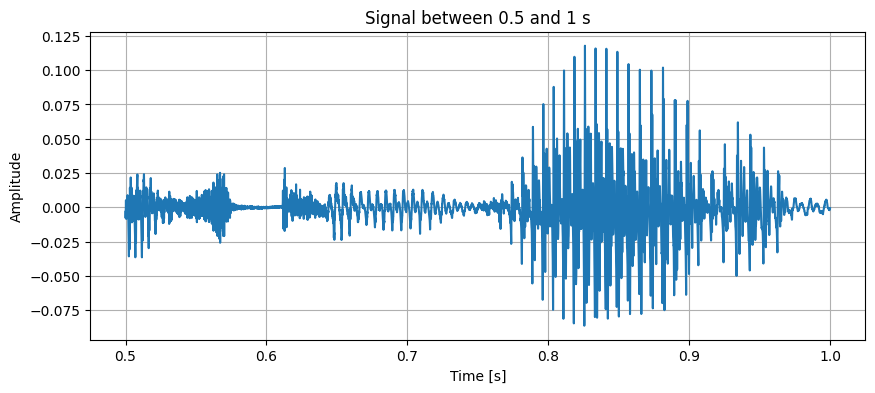

In [64]:
start_time = 0.5
end_time = 1.0

start_idx = int(start_time * fs_audio2)
end_idx = int(end_time * fs_audio2)

t = np.arange(len(x_audio2)) / fs_audio2

plt.figure(figsize=(10, 4))
plt.plot(t[start_idx:end_idx], x_audio2[start_idx:end_idx])
plt.title('Signal between 0.5 and 1 s')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



#### c,d) Compute DFT in a loop for 'audio1.wav'

Sampling rate = 44100 Hz
Frame length = 0.1 s → 4410 samples per frame


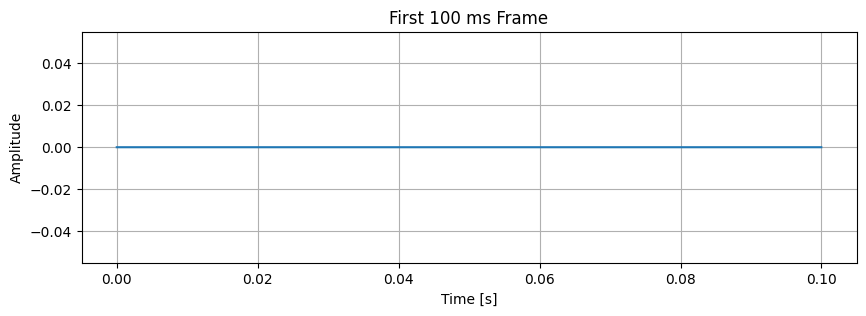

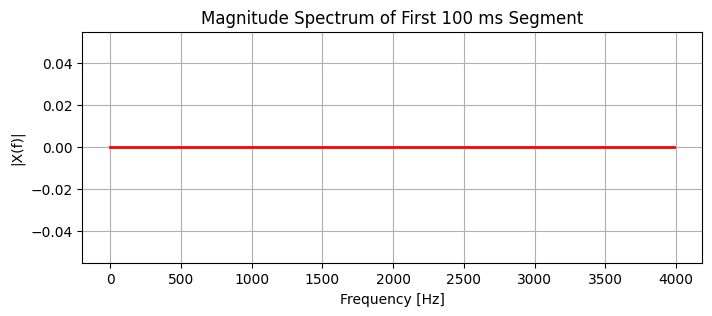

In [65]:
frame_length = 0.1           # 100 ms
frame_size = int(frame_length * fs_audio1)
nfft = 512                   # number of DFT points

print(f"Sampling rate = {fs_audio1} Hz")
print(f"Frame length = {frame_length} s → {frame_size} samples per frame")

# --- Loop over frames ---
for i in range(0, len(x_audio1), frame_size):
    frame = x_audio1[i:i + frame_size]

    # Stop if last frame is too short
    if len(frame) < frame_size:
        break

    # ---- Plot and compute only for the first frame ----
    if i == 0:
        # Time axis for the frame
        t = np.arange(len(frame)) / fs_audio1

        # (c) Plot time-domain signal (first 100 ms)
        plt.figure(figsize=(10, 3))
        plt.plot(t, frame)
        plt.title('First 100 ms Frame')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

        # (d) Apply DFT (FFT)
        X = fft(frame, nfft)
        freq_axis = np.fft.fftfreq(nfft, 1/fs)
        half = nfft // 2

        # Magnitude Spectrum
        plt.figure(figsize=(8, 3))
        plt.plot(freq_axis[:half], np.abs(X[:half]), 'r', linewidth=2)
        plt.title('Magnitude Spectrum of First 100 ms Segment')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('|X(f)|')
        plt.grid(True)
        plt.show()


#### c,d) Compute DFT in a loop for 'audio2.wav'

Sampling rate = 22050 Hz
Frame length = 0.1 s → 2205 samples per frame


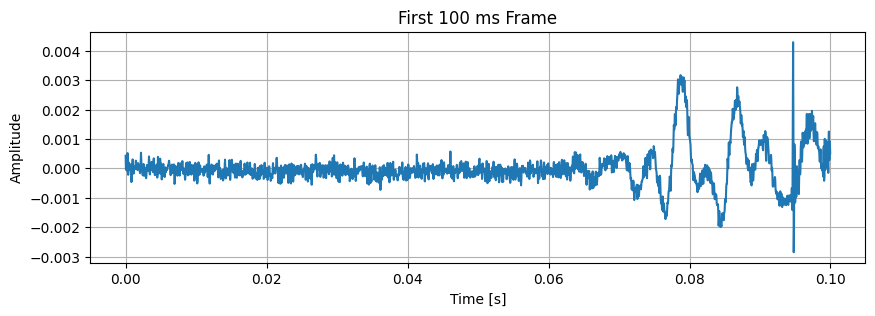

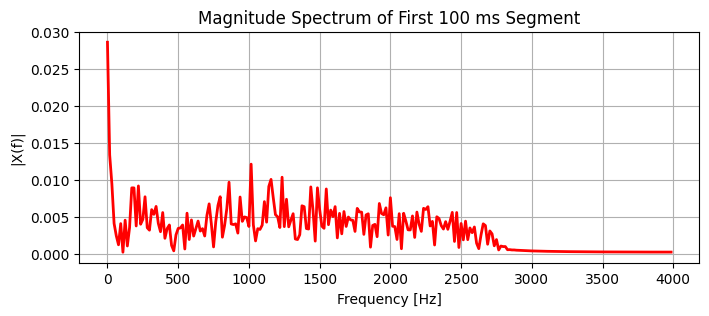

In [66]:
frame_length = 0.1           # 100 ms
frame_size = int(frame_length * fs_audio2)
nfft = 512                   # number of DFT points

print(f"Sampling rate = {fs_audio2} Hz")
print(f"Frame length = {frame_length} s → {frame_size} samples per frame")

# --- Loop over frames ---
for i in range(0, len(x_audio2), frame_size):
    frame = x_audio2[i:i + frame_size]

    # Stop if last frame is too short
    if len(frame) < frame_size:
        break

    # ---- Plot and compute only for the first frame ----
    if i == 0:
        # Time axis for the frame
        t = np.arange(len(frame)) / fs_audio2

        # (c) Plot time-domain signal (first 100 ms)
        plt.figure(figsize=(10, 3))
        plt.plot(t, frame)
        plt.title('First 100 ms Frame')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

        # (d) Apply DFT (FFT)
        X = fft(frame, nfft)
        freq_axis = np.fft.fftfreq(nfft, 1/fs)
        half = nfft // 2

        # Magnitude Spectrum
        plt.figure(figsize=(8, 3))
        plt.plot(freq_axis[:half], np.abs(X[:half]), 'r', linewidth=2)
        plt.title('Magnitude Spectrum of First 100 ms Segment')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('|X(f)|')
        plt.grid(True)
        plt.show()


#### e) How does the spectrum of these signals differ from that of sum of sinusoids?

The spectra of the real signals (audio1 and audio2) are broad, noisy, and time-varying, whereas the spectrum of the sum of sinusoids contains only a few fixed and distinct peaks at specific frequencies.

### Bonus problem: